In [1]:
from pymongo import MongoClient
import requests
import pandas as pd
import json
from sentiment_analysis_spanish import sentiment_analysis
import seaborn as sns
import matplotlib as plot
from textblob import TextBlob
from googletrans import Translator
import goslate
from src.traduciendo import intoEnglish


In [2]:
url = "http://localhost:5000/texto/"

In [22]:
urlr= "http://localhost:5000/rango/"

#### Voy a hacerle algunas querys de ejemplo a nuestra api, la salida de las querys siempre incluyen todos los datos, inicialmente las había hecho para que solo dieran el texto, o el texto y el nombre, pero al final pienso que es más útil siempre dar toda la información y que se modifique una vez descargada.
Por nombre:

In [32]:
queryn= "nombre=Martin Luther"

In [33]:
requests.get (url + queryn).json()

[{'Año': '1963',
  'Keywords': 'Keywords',
  'Nombre': 'Martin Luther King',
  'Partido': '',
  'Texto': "Y asi hemos venido aqui hoy para dramatizar una condicion extrema. En cierto sentido, llegamos a la capital de nuestra nacion para cobrar un cheque. Cuando los arquitectos de nuestra republica escribieron las magnificas palabras de la Constitucion y la Declaracion de Independencia, firmaban una promisoria nota de la que todo estadounidense seria heredero. Esa nota era una promesa de que todos los hombres tendrian garantizados los derechos inalienables de 'vida, libertad y busqueda de la felicidad'. Es obvio hoy que Estados Unidos ha fallado en su promesa en lo que respecta a sus ciudadanos de color. En vez de honrar su obligacion sagrada, Estados Unidos dio al negro un cheque sin valor que fue devuelto con el sello de 'fondos insuficientes'. Pero nos rehusamos a creer que el banco de la justicia esta quebrado. Nos rehusamos a creer que no hay fondos en los grandes depositos de opor

Por tipo:

In [146]:
queryt= "tipo=Protesta"

Por nombre y tipo:

In [40]:
requests.get (url + queryn + "/" + queryt ).json()

NameError: name 'queryt' is not defined

In [38]:
query= "nombre=Felipe Gonzalez Marquez/fecha1=2990/fecha2=2996" 

In [39]:
requests.get (urlr + query).json()

'su búsqueda no ha dado ningún resultado'

Y así tendríamos varias combinaciones, no todas las posibles. No pongo más ejemplos porque cualquier combinación va a dar todo de x autor al haber metido 1 solo discurso de cada autor.

Ahora vamos a centrarnos en sacar los discursos de investidura y meterlos en dataframes, voy a seleccionar el primer discurso, de 1979, uno de Aznar del año 2000, y el último de 2020, de Pedro Sánchez.

In [3]:
querys= "nombre=Adolfo Suarez Yllana"
querya= "fecha=2000"
querysa= "fecha=2020"

In [4]:
dfsuarez= pd.DataFrame (requests.get (url + querys).json())
dfsuarez

,Año,Keywords,Nombre,Partido,Texto,Tipo
0,1979,Keywords,Adolfo Suarez Yllana,UCD,"Senoras y senores diputados, por designacion d...",Investidura
1,1979,Keywords,Adolfo Suarez Yllana,UCD,"Me propongo, pues, en estricto cumplimiento de...",Investidura
2,1979,Keywords,Adolfo Suarez Yllana,UCD,El cambio politico realizado en nuestro pais h...,Investidura
3,1979,Keywords,Adolfo Suarez Yllana,UCD,"Se trata, por consiguiente, de saber realizar ...",Investidura
4,1979,Keywords,Adolfo Suarez Yllana,UCD,El cambio politico se verifico en torno a un e...,Investidura
...,...,...,...,...,...,...
193,1979,Keywords,Adolfo Suarez Yllana,UCD,Al comienzo de mi intervencion me permiti hace...,Investidura
194,1979,Keywords,Adolfo Suarez Yllana,UCD,El articulo 9.o de la Constitucion nos traza u...,Investidura
195,1979,Keywords,Adolfo Suarez Yllana,UCD,Desde este planteamiento es posible edificar u...,Investidura
196,1979,Keywords,Adolfo Suarez Yllana,UCD,Y todo ello con el designio final de contribui...,Investidura


In [5]:
dfaznar= pd.DataFrame (requests.get (url + querya).json())
dfaznar

,Año,Keywords,Nombre,Partido,Texto,Tipo
0,2000,Keywords,Jose Maria Aznar Lopez,PP,Comparezco hoy ante la Camara con objeto de so...,Investidura
1,2000,Keywords,Jose Maria Aznar Lopez,PP,El pasado 12 de marzo los espanoles han tenido...,Investidura
2,2000,Keywords,Jose Maria Aznar Lopez,PP,Toda eleccion es una victoria de la democracia...,Investidura
3,2000,Keywords,Jose Maria Aznar Lopez,PP,Hace veintidos anos decidimos construir juntos...,Investidura
4,2000,Keywords,Jose Maria Aznar Lopez,PP,La Constitucion es el mejor marco para ordenar...,Investidura
...,...,...,...,...,...,...
169,2000,Keywords,Jose Maria Aznar Lopez,PP,Acabo de exponer los puntos fundamentales del ...,Investidura
170,2000,Keywords,Jose Maria Aznar Lopez,PP,"Un programa para toda la Legislatura, que dese...",Investidura
171,2000,Keywords,Jose Maria Aznar Lopez,PP,Hace apenas un mes los electores han renovado ...,Investidura
172,2000,Keywords,Jose Maria Aznar Lopez,PP,"Senora presidenta, senoras y senores diputados...",Investidura


In [6]:
dfsanchez= pd.DataFrame (requests.get (url + querysa).json())
dfsanchez

,Año,Keywords,Nombre,Partido,Texto,Tipo
0,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,"Senora presidenta, senorias, senoras y senores...",Investidura
1,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,No se va a romper Espana. No se va a romper la...,Investidura
2,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,"Senorias, comparezco ante este Congreso de los...",Investidura
3,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,"Antes de exponer el programa de Gobierno, quie...",Investidura
4,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,"Otra es de caracter politico, directamente vin...",Investidura
...,...,...,...,...,...,...
256,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,Ante este cambio de decada es hora de recupera...,Investidura
257,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,La primera transformacion nos devolvio senoria...,Investidura
258,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,"Senorias, hay grupos de esta Camara que eviden...",Investidura
259,2020,Keywords,Pedro Sanchez Perez-Castejon,PSOE,Gracias.,Investidura


Nos quedamos con lo básico:

In [7]:
dfsanchez.drop(dfsanchez.tail(1).index,inplace=True) 

In [8]:
dfsanchez= dfsanchez[["Nombre", "Texto"]]
dfsuarez= dfsuarez [["Nombre", "Texto"]]
dfaznar= dfaznar [["Nombre", "Texto"]]

Y voy a utilizar la libreria SentimentAnalysisSpanish, que creo que es la adecuada.

In [9]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

In [10]:
dfsuarez["sentimiento"]= dfsuarez.Texto.apply (sentiment.sentiment)
dfaznar["sentimiento"]= dfaznar.Texto.apply (sentiment.sentiment)
dfsanchez["sentimiento"]= dfsanchez.Texto.apply (sentiment.sentiment)

<ipython-input-10-62e84a3e4c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsuarez["sentimiento"]= dfsuarez.Texto.apply (sentiment.sentiment)
<ipython-input-10-62e84a3e4c61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaznar["sentimiento"]= dfaznar.Texto.apply (sentiment.sentiment)
<ipython-input-10-62e84a3e4c61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

<AxesSubplot:xlabel='sentimiento', ylabel='Density'>

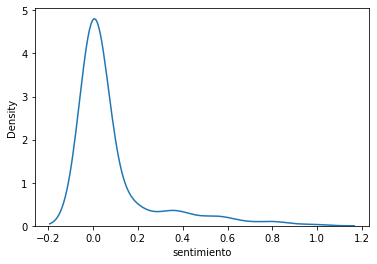

In [11]:
sns.kdeplot (dfsuarez.sentimiento)


<AxesSubplot:xlabel='sentimiento', ylabel='Density'>

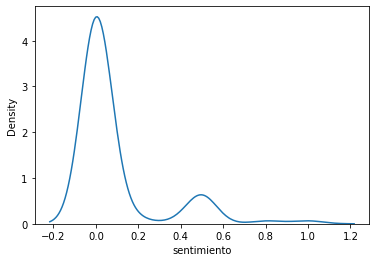

In [35]:
sns.kdeplot (dfaznar.sentimiento)

<AxesSubplot:xlabel='sentimiento', ylabel='Density'>

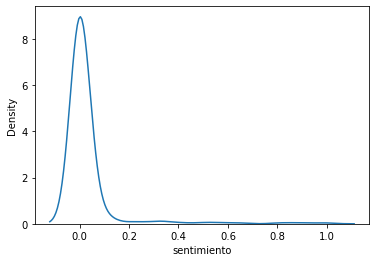

In [34]:
sns.kdeplot (dfsanchez.sentimiento)

#### Con esto sencillamente vemos que no nos enfrentamos a unos discursos muy apasionados, los 3 tienen su pico en el 0, lo que quiere decir que son más bien "asentimentales", siendo el discurso de Pedro Sanchez el que se pasa el juego en cuanto a neutralidad sentimental

<AxesSubplot:ylabel='sentimiento'>

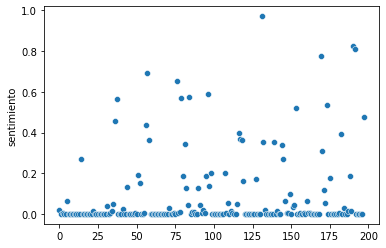

In [36]:
sns.scatterplot (data=dfsuarez.sentimiento)

<AxesSubplot:ylabel='sentimiento'>

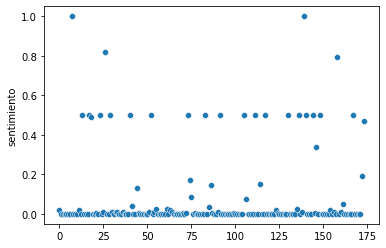

In [32]:
sns.scatterplot (data=dfaznar.sentimiento)

<AxesSubplot:ylabel='sentimiento'>

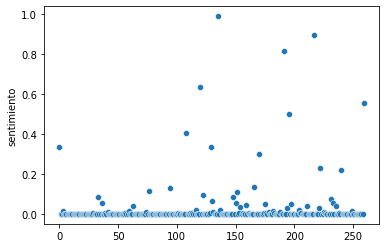

In [31]:
sns.scatterplot (data=dfsanchez.sentimiento)

Con la distribución vemos un poco lo mismo de antes. Aunque en este caso podemos ver también la "organizaciñón" de los discursos, siendo el de Suarez el más disperso, el de Aznar el más "robotizado" con esas frases al 0,5 de sentimiento, y el de Sanchez continúa destacando por el sosiego, asentimentalismo. Una causa probable es la profesionalización de la política. 

En cualquier caso, la verdad que esperaba encontrar un in crescendo en los discursos, o una cierta modularidad que nos diera algo de chicha para analizar. El in crescendo se ve suficientemente, pero quizás algo débil, en terminos porcentuales es muy bajo

Vamos a ver si pasándolo a inglés y con otra librería nos dá unos resultados más jugosos


In [19]:
spanish_string = TextBlob(u'que tengas buen buen day')
english_blob=spanish_string.translate(from_lang='es',to='en')
english_blob

HTTPError: HTTP Error 429: Too Many Requests

In [13]:
dfsuarez["Traducido"] = dfsuarez.Texto.apply(intoEnglish)
dfaznar["Traducido"] = dfaznar.Texto.apply(intoEnglish)
dfsanchez["Traducido"] = dfsanchez.Texto.apply(intoEnglish)

<ipython-input-13-ec6ae1804beb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsuarez["Traducido"] = dfsuarez.Texto.apply(intoEnglish)
<ipython-input-13-ec6ae1804beb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaznar["Traducido"] = dfaznar.Texto.apply(intoEnglish)
<ipython-input-13-ec6ae1804beb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [14]:
gs= goslate.Goslate ()

In [18]:
word= gs.translate ("hola", "en")

HTTPError: HTTP Error 429: Too Many Requests

No puedo pasarlo a inglés porque con las librerias que he probado, goslate, textblob, googletrans y goopytrans he excedido las requests y no me va a dar tiempo a que se renueven. Todas utilizan la api de google.